<a href="https://colab.research.google.com/github/amitshahi04/PyTorch/blob/Master/03_pytorch_computer_vision_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#PyTorch Computer Vision

#Computer Vision Library in PyTorch

import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


In [ ]:
#Getting a dataset
#Setup training data

train_data = datasets.FashionMNIST(
    root= "data",
    train= True,
    download= True,
    transform= torchvision.transforms.ToTensor(),
    target_transform= None
)

test_data= datasets.FashionMNIST(
    root= "data",
    train= False,
    download= True,
    transform= ToTensor(),
    target_transform= None
)

100%|██████████| 26421880/26421880 [00:02<00:00, 12441261.69it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 212357.16it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3863891.25it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 1584521.68it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

Image Shape:torch.Size([1, 28, 28])


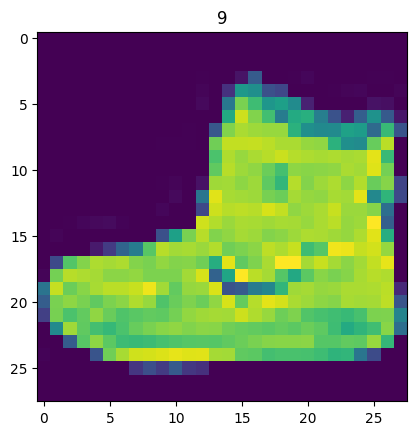

In [ ]:
#See the first training example
image, label= train_data[0]
print(f"Image Shape:{image.shape}")
plt.imshow(image.squeeze())
plt.title(label);

In [ ]:
class_names= train_data.classes

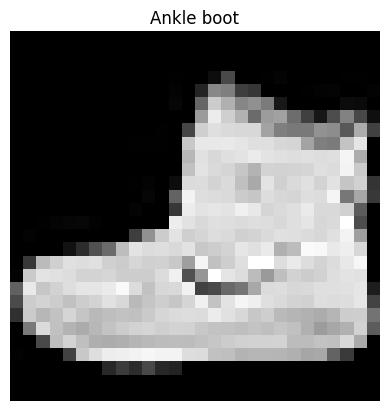

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False);


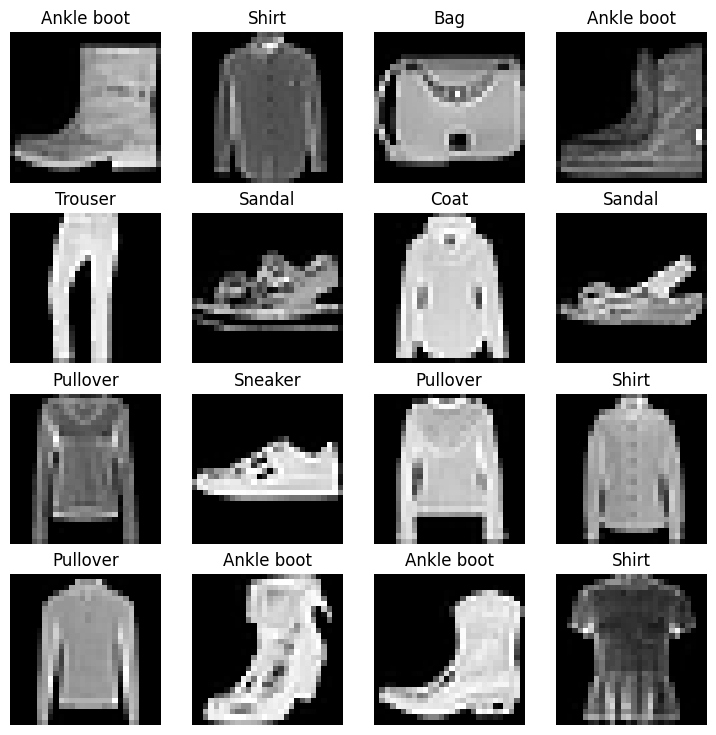

In [ ]:
#Plot more images

torch.manual_seed(42)
fig= plt.figure(figsize=(9,9))
rows, cols= 4, 4
for i in range(1, rows*cols+1):
  random_idx= torch.randint(0, len(train_data), size=[1]).item()
  img, label= train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)


In [ ]:
# Prepare DataLoader

#Dataloader turns out dataset into iterable
#Turn data into batches (batch size 32)

from torch.utils.data import DataLoader

BATCH_SIZE= 32

train_dataloader= DataLoader(dataset= train_data,
                            batch_size= BATCH_SIZE,
                            shuffle= True)

test_dataloader= DataLoader(dataset= test_data,
                            batch_size= BATCH_SIZE)

In [ ]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fec6042d240>,
 <torch.utils.data.dataloader.DataLoader at 0x7feb85af0eb0>)

In [ ]:
print(f"Dataloaders: {train_dataloader, test_dataloader}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7fec6042d240>, <torch.utils.data.dataloader.DataLoader object at 0x7feb85af0eb0>)


In [ ]:
train_features_batch, train_labels_batch= next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


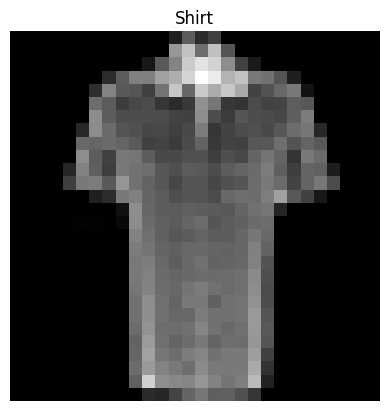

In [ ]:
torch.manual_seed(42)
random_idx= torch.randint(0, len(train_features_batch), size=[1]).item()
img, label= train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image Size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [ ]:
#Build Model 0
flatten_model= nn.Flatten()

x= train_features_batch[0]
output= flatten_model(x)

print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [ ]:
output.squeeze()

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0000, 0.0000, 0.0078, 0.0078,
        0.0000, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.2863, 0.0000, 0.0000, 0.0078, 

In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack= nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= input_shape,
                  out_features= hidden_units),
        nn.Linear(in_features= hidden_units,
                  out_features= output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)



In [ ]:
torch.manual_seed(42)

model_0= FashionMNISTModelV0(
    input_shape= 784, #this is 28*28
    hidden_units= 10,
    output_shape= len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x= torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_function.py already exists. Skipping download....")
else:
  print("Downloading helper_functions.py")
  request= requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
from helper_functions import accuracy_fn

#setup loss function and optimizer

loss_fn= nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params= model_0.parameters(),
                           lr= 0.1)

In [ ]:
#Create function to time our experiments

from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device= None):
  total_time= end - start
  print(f"Train time on {device}: {total_time: .3f} seconds")
  return total_time

In [ ]:
start_time = timer()

end_time= timer()

print_train_time(start_time, end_time)

Train time on None:  0.000 seconds


4.300100000875773e-05

In [ ]:
#Create train loop

from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu= timer()

epochs= 3

#Create train test loop

for epoch in tqdm(range(epochs)):
  print(f"EPoch: {epoch}\n-----")
  train_loss= 0
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    y_pred= model_0(X)
    loss= loss_fn(y_pred, y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch%400 == 0:
      print(f"Looked at{batch*len(X)}/{len(train_dataloader.dataset)} samples.")

  train_loss /= len(train_dataloader)

  test_loss, test_acc= 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      test_pred= model_0(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true= y_test, y_pred= test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"\nTrain loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}| Test acc: {test_acc}")

  train_time_end_on_cpu= timer()
total_train_time_model_0= print_train_time(start= train_time_start_on_cpu,
                                             end= train_time_end_on_cpu,
                                             device= str(next(model_0.parameters()).device))





  0%|          | 0/3 [00:00<?, ?it/s]

EPoch: 0
-----
Looked at0/60000 samples.
Looked at12800/60000 samples.
Looked at25600/60000 samples.
Looked at38400/60000 samples.
Looked at51200/60000 samples.

Train loss: 0.5904 | Test Loss: 0.5095| Test acc: 82.03873801916933
EPoch: 1
-----
Looked at0/60000 samples.
Looked at12800/60000 samples.
Looked at25600/60000 samples.
Looked at38400/60000 samples.
Looked at51200/60000 samples.

Train loss: 0.4763 | Test Loss: 0.4799| Test acc: 83.19688498402556
EPoch: 2
-----
Looked at0/60000 samples.
Looked at12800/60000 samples.
Looked at25600/60000 samples.
Looked at38400/60000 samples.
Looked at51200/60000 samples.

Train loss: 0.4550 | Test Loss: 0.4766| Test acc: 83.42651757188499
Train time on cpu:  32.410 seconds


In [ ]:
import torch
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  loss, acc= 0, 0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      X, y= X.to(device), y.to(device)
      model= model.to(device)
      y_pred= model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true= y,
                         y_pred= y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

model_0_results= eval_model(model= model_0,
                           data_loader= test_dataloader,
                           loss_fn= loss_fn,
                           accuracy_fn= accuracy_fn)

model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
!nvidia-smi

Sun Mar  3 15:50:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0              28W /  70W |    151MiB / 15360MiB |      3%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
torch.cuda.is_available()

True

In [ ]:
!nvidia-smi

Sun Mar  3 15:50:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0              28W /  70W |    151MiB / 15360MiB |      1%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
torch.cuda.is_available()

True

In [ ]:
import torch
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack= nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= input_shape,
                  out_features= hidden_units),
        nn.ReLU(),
        nn.Linear(in_features= hidden_units,
                  out_features= output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
torch.manual_seed(42)
model_1= FashionMNISTModelV1(input_shape= 784,
                             hidden_units=10,
                             output_shape= len(class_names)).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
from helper_functions import accuracy_fn
loss_fn= nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params= model_1.parameters(),
                           lr= 0.1)

In [ ]:
#Functionize Train and Test Loop

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device= device):
  train_loss, train_acc= 0, 0
  model.train()
  for batch, (X, y) in enumerate(data_loader):
    X, y= X.to(device), y.to(device)
    y_pred= model(X)
    loss= loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true= y,
                     y_pred= y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train Loss: {train_loss:.5f}| Train Acc: {train_acc:.2f}%")


In [ ]:
import torch
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device= device):
  test_loss, test_acc= 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y= X.to(device), y.to(device)
      test_pred= model(X)
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true= y,
                              y_pred= test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test Loss: {test_loss:.5f}| Test Acc: {test_acc:.2f}%\n")


In [ ]:
torch.manual_seed(42)

#Measure time

from timeit import default_timer as timer
train_time_start_on_gpu= timer()
epoch= 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model= model_1,
             data_loader= train_dataloader,
             loss_fn= loss_fn,
             optimizer= optimizer,
             accuracy_fn= accuracy_fn,
             device= device)
  test_step(model= model_1,
            data_loader= test_dataloader,
            loss_fn= loss_fn,
            accuracy_fn= accuracy_fn,
            device= device)

train_time_end_on_gpu= timer()

total_train_time_model_1= print_train_time(start= train_time_start_on_gpu,
                                           end= train_time_end_on_gpu,
                                           device= device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train Loss: 1.09199| Train Acc: 61.34%
Test Loss: 0.95636| Test Acc: 65.00%

Epoch: 1
-------
Train Loss: 0.78101| Train Acc: 71.93%
Test Loss: 0.72227| Test Acc: 73.91%

Epoch: 2
-------
Train Loss: 0.67027| Train Acc: 75.94%
Test Loss: 0.68500| Test Acc: 75.02%

Train time on cuda:  69.733 seconds


In [ ]:
model_1_results= eval_model(model= model_1,
                            data_loader= test_dataloader,
                            loss_fn= loss_fn,
                            accuracy_fn= accuracy_fn,
                            device= device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1= nn.Sequential(
        nn.Conv2d(in_channels= input_shape,
                  out_channels= hidden_units,
                  kernel_size= 3,
                  stride= 1,
                  padding= 1),
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units,
                  out_channels= hidden_units,
                  kernel_size= 3,
                  stride= 1,
                  padding= 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size= 2)
    )
    self.conv_block_2= nn.Sequential(
        nn.Conv2d(in_channels= hidden_units,
                  out_channels= hidden_units,
                  kernel_size= 3,
                  stride= 1,
                  padding= 1),
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units,
                  out_channels= hidden_units,
                  kernel_size= 3,
                  stride= 1,
                  padding= 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size= 2)
    )
    self.classifier= nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= hidden_units*7*7,
                  out_features= output_shape)
    )

  def forward(self, x):
    x= self.conv_block_1(x)
    #print(x.shape)
    x= self.conv_block_2(x)
    #print(x.shape)
    x= self.classifier(x)
    #print(x.shape)
    return(x)


In [ ]:
torch.manual_seed(42)
model_2= FashionMNISTModelV2(input_shape= 1,
                             hidden_units= 10,
                             output_shape= len(class_names)).to(device)

In [ ]:
torch.manual_seed(42)

images= torch.randn(size= (32, 3, 64, 64))
test_image= images[0]

In [ ]:
torch.manual_seed(42)
conv_layer= nn.Conv2d(in_channels= 3,
                      out_channels= 10,
                      kernel_size= 3,
                      stride= 1,
                      padding= 0)

#Pass the datas through the convulational layers

conv_output= conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

In [ ]:
#Stepping through nn.MaxPool2d()

test_image.shape

torch.Size([3, 64, 64])

In [ ]:
max_pool_layer= nn.MaxPool2d(kernel_size= 2)

test_image_through_conv= conv_layer(test_image)
test_image_through_conv_and_max_pool= max_pool_layer(test_image_through_conv)
test_image_through_conv_and_max_pool.shape

torch.Size([10, 31, 31])

In [ ]:
import torch
torch.manual_seed(42)
model_2= FashionMNISTModelV2(input_shape= 1,
                             hidden_units= 10,
                             output_shape= len(class_names)).to(device)

In [ ]:
model_2(image.unsqueeze(0).to(device))

tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
test_flatten= nn.Flatten()
flatten_images= torch.randn(size=[10,7,7])
y= test_flatten(flatten_images.unsqueeze(0))
y.shape

torch.Size([1, 490])

In [ ]:
#Setup loss function/ eval metrics/optimizer

from helper_functions import accuracy_fn

loss_fn= nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params= model_2.parameters(),
                           lr= 0.1)

In [ ]:
#Use train and test functions

torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer

train_time_start_model_2= timer()

#Train and test model

epochs= 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----")
  train_step(model= model_2,
             data_loader= train_dataloader,
             loss_fn = loss_fn,
             optimizer= optimizer,
             accuracy_fn= accuracy_fn,
             device= device)
  test_step(model= model_2,
            data_loader= test_dataloader,
            loss_fn= loss_fn,
            accuracy_fn= accuracy_fn,
            device= device)

  train_time_end_model_2= timer()

  total_train_time_model_2= print_train_time(start= train_time_start_model_2,
                                             end= train_time_end_model_2,
                                             device= device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Train Loss: 0.59631| Train Acc: 78.42%
Test Loss: 0.39774| Test Acc: 85.97%

Train time on cuda:  13.482 seconds
Epoch: 1
----
Train Loss: 0.36235| Train Acc: 86.89%
Test Loss: 0.35222| Test Acc: 87.17%

Train time on cuda:  25.726 seconds
Epoch: 2
----
Train Loss: 0.32569| Train Acc: 88.14%
Test Loss: 0.32809| Test Acc: 88.16%

Train time on cuda:  38.041 seconds


In [ ]:
#model_2 results

model_2_results= eval_model(model= model_2,
                            data_loader= test_dataloader,
                            loss_fn = loss_fn,
                            accuracy_fn= accuracy_fn,
                            device= device)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32809019088745117,
 'model_acc': 88.15894568690096}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
import pandas as pd
compare_results= pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.328090,88.158946


In [ ]:
#Add training time to results comparison

compare_results["training_time"]= [total_train_time_model_0,
                                     total_train_time_model_1,
                                     total_train_time_model_2]
compare_results


,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,32.410089
1,FashionMNISTModelV1,0.685001,75.019968,69.733347
2,FashionMNISTModelV2,0.328090,88.158946,38.041084


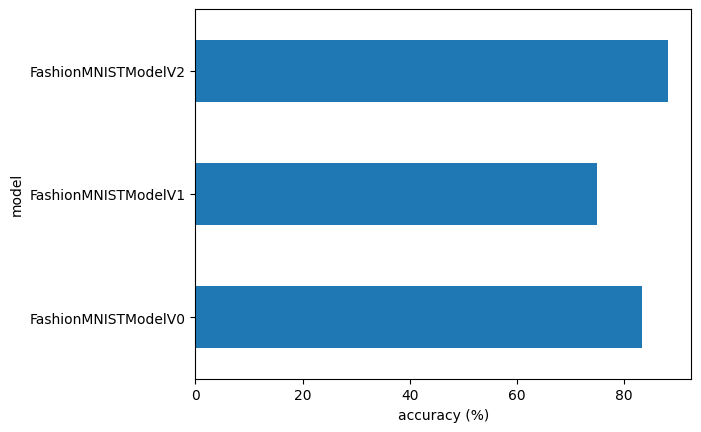

In [ ]:
#Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

In [ ]:
#Make and evaluate random predicitions with the best model

def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device= device):
  pred_probs= []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample= torch.unsqueeze(sample, dim= 0).to(device)
      pred_logit= model(sample)
      pred_prob= torch.softmax(pred_logit.squeeze(), dim=0)
      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)




In [ ]:
import random

#random.seed(42)
test_samples= []
test_labels= []

for sample, label in random.sample(list(test_data), k= 9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape


torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Ankle boot')

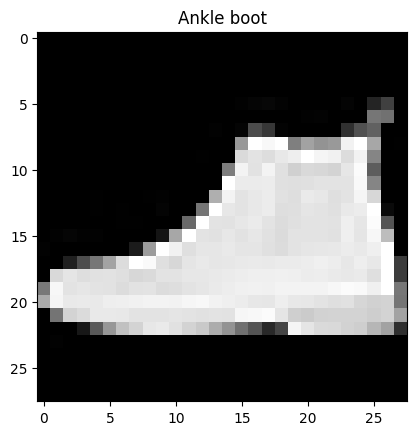

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap= "gray")
plt.title(class_names[test_labels[0]])

In [ ]:
#Make predicitons

pred_probs= make_predictions(model= model_2,
                             data= test_samples)

#View first two test predicitions

pred_probs[:2]

tensor([[5.7219e-07, 1.0271e-07, 1.4522e-07, 9.4113e-07, 1.5202e-08, 7.3341e-04,
         2.4607e-07, 3.3899e-03, 7.5070e-05, 9.9580e-01],
        [9.5657e-01, 4.7044e-06, 3.1136e-04, 3.4704e-03, 3.1660e-06, 2.9896e-08,
         3.9600e-02, 3.1684e-07, 3.5721e-05, 2.4429e-08]])

In [ ]:
#Convert predicitions probabilities to labels

pred_classes= pred_probs.argmax(dim= 1)
pred_classes

tensor([9, 0, 5, 9, 5, 0, 7, 1, 7])

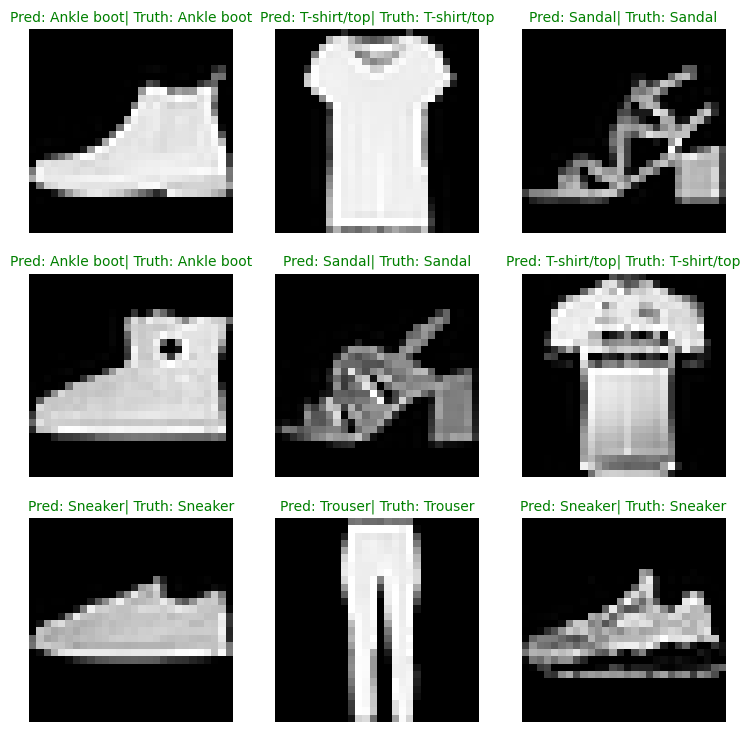

In [ ]:
#Plot predicitons

plt.figure(figsize= (9, 9))
nrows= 3
ncols= 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)

  plt.imshow(sample.squeeze(), cmap= "gray")

  pred_label= class_names[pred_classes[i]]

  truth_label= class_names[test_labels[i]]

  title_text= f"Pred: {pred_label}| Truth: {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize= 10, c= "g")
  else:
    plt.title(title_text, fontsize= 10, c= "r")

  plt.axis(False);

In [ ]:
import mlxtend

In [ ]:
mlxtend.__version__

'0.22.0'

In [ ]:
from tqdm.auto import tqdm

y_preds= []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc= "Making Predictions..."):
    X, y= X.to(device), y.to(device)
    y_logit= model_2(X)
    y_pred= torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())

#print(y_preds)
y_pred_tensor= torch.cat(y_preds)
y_pred_tensor

Making Predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 2])

In [ ]:
len(y_pred_tensor)

10000

In [ ]:
try:
  import torchmetrics
except:
  !pip install -q torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 7.6 MB/s eta 0:00:00


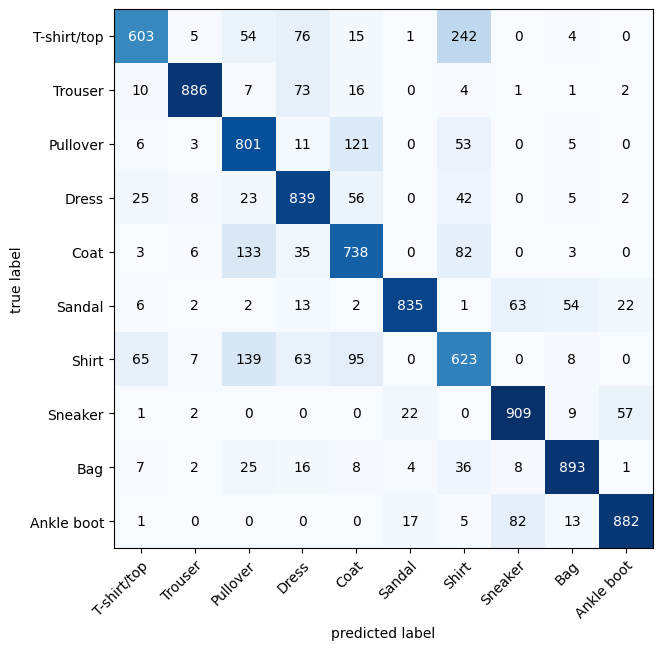

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat= ConfusionMatrix(num_classes= len(class_names), task="multiclass")
confmat_tensor= confmat(preds= y_pred_tensor,
                        target= test_data.targets)


fig, ax= plot_confusion_matrix(
    conf_mat= confmat_tensor.numpy(),
    class_names= class_names,
    figsize= (10, 7)
)

In [ ]:
confmat_tensor

tensor([[603,   5,  54,  76,  15,   1, 242,   0,   4,   0],
        [ 10, 886,   7,  73,  16,   0,   4,   1,   1,   2],
        [  6,   3, 801,  11, 121,   0,  53,   0,   5,   0],
        [ 25,   8,  23, 839,  56,   0,  42,   0,   5,   2],
        [  3,   6, 133,  35, 738,   0,  82,   0,   3,   0],
        [  6,   2,   2,  13,   2, 835,   1,  63,  54,  22],
        [ 65,   7, 139,  63,  95,   0, 623,   0,   8,   0],
        [  1,   2,   0,   0,   0,  22,   0, 909,   9,  57],
        [  7,   2,  25,  16,   8,   4,  36,   8, 893,   1],
        [  1,   0,   0,   0,   0,  17,   5,  82,  13, 882]])

In [ ]:
from pathlib import Path

MODEL_PATH= Path("models")
MODEL_PATH.mkdir(parents= True,
                 exist_ok= True)

MODEL_NAME= "03_pytorch_computer_vision_model_2.pth"

MODEL_SAVE_PATH= MODEL_PATH/ MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")

torch.save(obj= model_2.state_dict(),
           f= MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [ ]:
torch.manual_seed(42)

loaded_model_2= FashionMNISTModelV2(input_shape= 1,
                                    hidden_units= 10,
                                    output_shape= len(class_names))

loaded_model_2.load_state_dict(torch.load(f= MODEL_SAVE_PATH))

loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
#Evaluate loaded model

torch.manual_seed(42)

loaded_model_2_results= eval_model(
    model= loaded_model_2,
    data_loader= test_dataloader,
    loss_fn= loss_fn,
    accuracy_fn= accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32809019088745117,
 'model_acc': 88.15894568690096}

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32809019088745117,
 'model_acc': 88.15894568690096}

In [ ]:
#Check if model results are close to each otehr

torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol= 1e-02)

tensor(True)